# DATA PRE-PROCESSING AND DATA ANALYSIS
## Dataset: housing-prices-dataset.csv

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()

---
# PHẦN 1: ĐỌC TẬP TIN DỮ LIỆU DỰ BÁO GIÁ NHÀ

## 1. Đọc tập tin dữ liệu housing-prices-dataset.csv

In [23]:
df = pd.read_csv('housing-prices-dataset.csv')

## 2. Xem thông tin sơ bộ: shape/head/tail/info...

In [ ]:
# Shape
print("Shape:", df.shape)

In [ ]:
# Head
df.head()

In [ ]:
# Tail
df.tail()

In [ ]:
# Info
df.info()

## 3. Kiểm tra dữ liệu bị trùng và xử lý (nếu có)

In [ ]:
# Kiểm tra duplicate
print("Có dữ liệu trùng:", df.duplicated().any())
print("Số dòng trùng:", df.duplicated().sum())

In [ ]:
# Xử lý nếu có
if df.duplicated().any():
    df.drop_duplicates(inplace=True)
    print(f"Đã xóa duplicate. Shape mới: {df.shape}")
else:
    print("Không có dữ liệu trùng")

---
# PHẦN 2: EDA

## 1. Chọn các biến sau đây để phân tích: 'LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice'

In [ ]:
# Chọn các biến cần phân tích
selected_vars = ['LotShape', 'Street', 'HouseStyle', 'LotArea', 'YearBuilt', 
                 '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'SalePrice']

df_analysis = df[selected_vars].copy()
print("Shape của dữ liệu phân tích:", df_analysis.shape)
df_analysis.head()

## 2. Trong các biến trên hãy xác định các biến định tính và các biến định lượng. In thông tin các biến này như số lượng giá trị duy nhất và các giá trị duy nhất

In [ ]:
# Xác định biến định tính và định lượng
print(df_analysis.dtypes)

# Biến định tính (object)
qualitative_vars = df_analysis.select_dtypes(include='object').columns.tolist()
print(f"\nBiến định tính: {qualitative_vars}")

# Biến định lượng (int, float)
quantitative_vars = df_analysis.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\nBiến định lượng : {quantitative_vars}")

## 3. Kiểm tra dữ liệu bị thiếu và xử lý (nếu có)

In [ ]:
# Biến định tính
for var in qualitative_vars:
    # Biến định tính: điền mode  
    df_analysis[var].fillna(df_analysis[var].mode()[0], inplace=True)
    print("\n")

In [46]:
# Biến định tính
for var in quantitative_vars:
    # Biến định lượng: điền mean
    df_analysis[var].fillna(df_analysis[var].mean(), inplace=True)

## 4. Thực hiện thống kê mô tả (describe) cho các biến trên và nêu nhận xét

In [ ]:
# Thống kê mô tả biến định lượng
df_analysis[quantitative_vars].describe()

In [ ]:
# Thống kê mô tả biến định tính
for var in qualitative_vars:
    print(df_analysis[var].value_counts())
    print("\n")

## 5. Phân tích 1 biến (cho nhận xét)

In [53]:
# Phân tích biến SalePrice (biến output)
print("PHÂN TÍCH BIẾN SalePrice:")
print(df_analysis['SalePrice'].describe())
print(f"\nSkewness: {df_analysis['SalePrice'].skew():.4f}")
print(f"Kurtosis: {df_analysis['SalePrice'].kurtosis():.4f}")

PHÂN TÍCH BIẾN SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.8829
Kurtosis: 6.5363


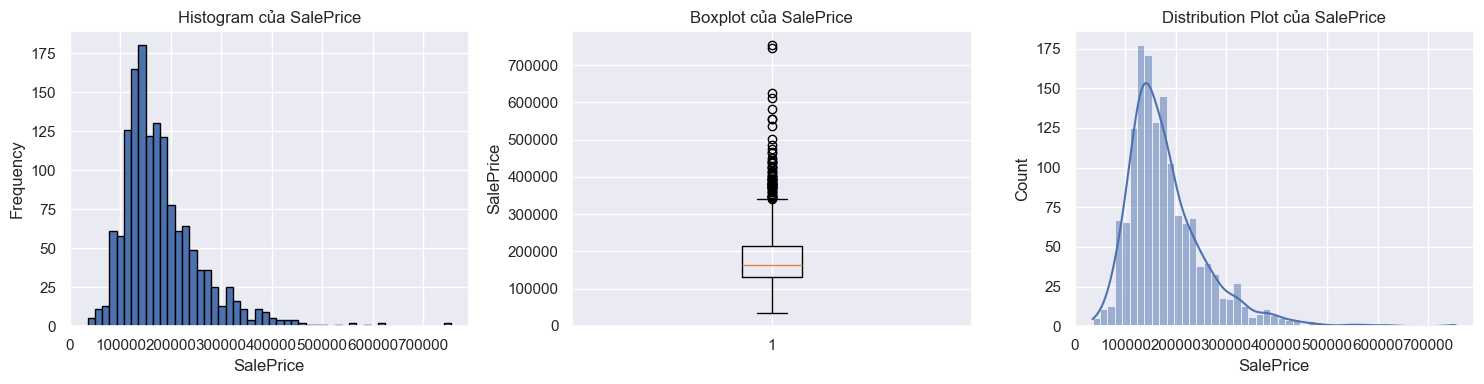

In [56]:
# Visualize SalePrice
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df_analysis['SalePrice'], bins=50, edgecolor='black')
axes[0].set_title('Histogram của SalePrice')
axes[0].set_xlabel('SalePrice')
axes[0].set_ylabel('Frequency')

# Boxplot
axes[1].boxplot(df_analysis['SalePrice'])
axes[1].set_title('Boxplot của SalePrice')
axes[1].set_ylabel('SalePrice')

# Distribution plot
sns.histplot(df_analysis['SalePrice'], kde=True, ax=axes[2])
axes[2].set_title('Distribution Plot của SalePrice')
axes[2].set_xlabel('SalePrice')

plt.tight_layout()
plt.show()

**NHẬN XÉT:**
- Phân phối SalePrice lệch phải (skewness > 0)
- Có một số outliers ở giá trị cao

## 6. Phân tích 2 biến (cho nhận xét)

### 6.1. Phân tích 2 biến định lượng: SalePrice và LotArea

In [ ]:
# Tương quan giữa SalePrice và LotArea
correlation = df_analysis[['LotArea', 'SalePrice']].corr()
print("Ma trận tương quan:")
print(correlation)
print(f"\nHệ số tương quan: {correlation.iloc[0,1]:.4f}")

In [57]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_analysis['LotArea'], df_analysis['SalePrice'], alpha=0.5)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Scatter Plot: SalePrice vs LotArea')
plt.show()

**NHẬN XÉT:**
- Tương quan giữa SalePrice và LotArea là **dương và yếu** (hệ số tương quan = 0.2638)
- Khi LotArea tăng, SalePrice có xu hướng **tăng nhẹ**, tuy nhiên mối quan hệ không chặt chẽ
- Có một số outliers với LotArea rất lớn (>150,000 square feet) nhưng giá bán không tương ứng cao
- Điều này cho thấy **LotArea đơn thuần không phải là yếu tố quyết định chính** đến giá nhà, cần xem xét kết hợp với các yếu tố khác như chất lượng nhà (OverallQual), vị trí (Neighborhood), diện tích sống (GrLivArea)

### 6.2. Phân tích biến định tính và định lượng: HouseStyle và SalePrice

In [60]:
# So sánh SalePrice theo HouseStyle
print("SalePrice trung bình theo HouseStyle:")
print(df_analysis.groupby('HouseStyle')['SalePrice'].agg(['mean', 'median', 'count']))

SalePrice trung bình theo HouseStyle:
                     mean    median  count
HouseStyle                                
1.5Fin      143116.740260  132000.0    154
1.5Unf      110150.000000  111250.0     14
1Story      175985.477961  154750.0    726
2.5Fin      220000.000000  194000.0      8
2.5Unf      157354.545455  133900.0     11
2Story      210051.764045  190000.0    445
SFoyer      135074.486486  135960.0     37
SLvl        166703.384615  164500.0     65


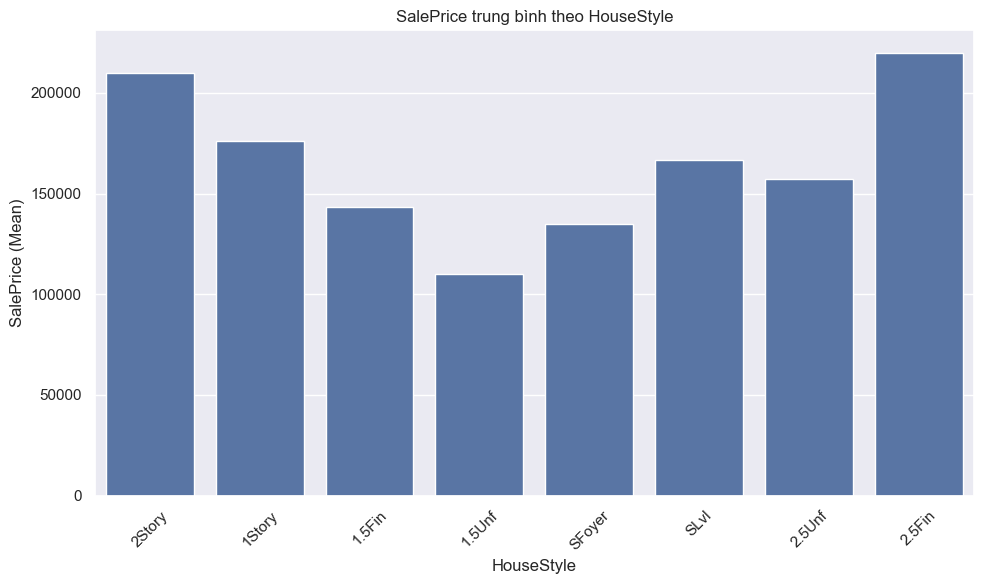

In [61]:
# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_analysis, x='HouseStyle', y='SalePrice', ci=None)
plt.xticks(rotation=45)
plt.title('SalePrice trung bình theo HouseStyle')
plt.ylabel('SalePrice (Mean)')
plt.tight_layout()
plt.show()

In [63]:
# ANOVA test
from scipy.stats import f_oneway

groups = [group['SalePrice'].values for name, group in df_analysis.groupby('HouseStyle')]
f_stat, p_value = f_oneway(*groups)

print(f"ANOVA Test:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")
print(f"\nKết luận: {'Có sự khác biệt ý nghĩa' if p_value < 0.05 else 'Không có sự khác biệt ý nghĩa'} về SalePrice giữa các HouseStyle")

ANOVA Test:
F-statistic: 19.5950
p-value: 0.0000

Kết luận: Có sự khác biệt ý nghĩa về SalePrice giữa các HouseStyle


**NHẬN XÉT:**
- HouseStyle **2Story** có giá trung bình cao nhất (~210,051), tiếp theo là **2.5Fin** (~220,000 mean nhưng chỉ 8 mẫu)
- HouseStyle **1.5Unf** có giá trung bình thấp nhất (~110,150), cho thấy nhà chưa hoàn thiện có giá thấp hơn đáng kể
- Có sự **khác biệt đáng kể** về giá nhà giữa các loại HouseStyle (p-value = 0.0000 < 0.05)

## 7. Kiểm tra và xóa các outlier (nếu có)

In [ ]:
# Phát hiện outliers bằng phương pháp IQR cho SalePrice
Q1 = df_analysis['SalePrice'].quantile(0.25)
Q2 = df_analysis['SalePrice'].quantile(0.50)
Q3 = df_analysis['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 (25%): {Q1:,.0f}")
print(f"Q2 (50%): {Q2:,.0f}")
print(f"Q3 (75%): {Q3:,.0f}")
print(f"IQR: {IQR:,.0f}")

# Xác định ngưỡng outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nLower bound: {lower_bound:,.0f}")
print(f"Upper bound: {upper_bound:,.0f}")

In [ ]:
# Tìm outliers
outliers = df_analysis[(df_analysis['SalePrice'] < lower_bound) | (df_analysis['SalePrice'] > upper_bound)]
print(f"Số lượng outliers: {len(outliers)} ({len(outliers)/len(df_analysis)*100:.2f}%)")
print(f"Shape trước khi xóa: {df_analysis.shape}")

In [66]:
# Xóa outliers
df_analysis = df_analysis[(df_analysis['SalePrice'] >= lower_bound) & (df_analysis['SalePrice'] <= upper_bound)]
print(f"Shape sau khi xóa: {df_analysis.shape}")

Shape sau khi xóa: (1399, 11)


In [ ]:
# Kiểm tra lại bằng boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_analysis['SalePrice'])
plt.title('Boxplot SalePrice sau khi xóa outliers')
plt.show()

---
# PHẦN 3: FEATURE ENGINEERING

## 1. Chọn ra các biến định lượng input có tương quan với biến output (xét hệ số tương quan >= 0.3 hoặc <= -0.3)

In [ ]:
from scipy.stats import pearsonr

# Các biến định lượng input (loại bỏ SalePrice)
quant_input_vars = [var for var in quantitative_vars if var != 'SalePrice']

print("PHÂN TÍCH TƯƠNG QUAN VỚI SalePrice:")
print("="*60)

selected_quant_vars = []
for var in quant_input_vars:
    corr, pval = pearsonr(df_analysis[var], df_analysis['SalePrice'])
    status = "CHỌN" if abs(corr) >= 0.3 else "LOẠI"
    print(f"{var:20s}: corr={corr:7.4f}, p-value={pval:.4f} => {status}")
    
    if abs(corr) >= 0.3:
        selected_quant_vars.append(var)

print(f"\nCác biến định lượng được chọn ({len(selected_quant_vars)}): {selected_quant_vars}")

## 2. Chọn ra các biến định tính input có tương quan với biến output (xét p-value <= 0.05)

In [ ]:
from scipy.stats import f_oneway

print("KIỂM ĐỊNH ANOVA CHO BIẾN ĐỊNH TÍNH:")
print("="*60)

selected_qual_vars = []
for var in qualitative_vars:
    groups = [group['SalePrice'].values for name, group in df_analysis.groupby(var)]
    f_stat, p_value = f_oneway(*groups)
    status = "CHỌN" if p_value <= 0.05 else "LOẠI"
    print(f"{var:20s}: F={f_stat:8.4f}, p-value={p_value:.4f} => {status}")
    
    if p_value <= 0.05:
        selected_qual_vars.append(var)

print(f"\nCác biến định tính được chọn ({len(selected_qual_vars)}): {selected_qual_vars}")

## 3. Chuẩn hóa các biến định tính input bằng One-Hot Encoder

In [ ]:
# Tạo X với các biến đã chọn
X = df_analysis[selected_qual_vars + selected_quant_vars].copy()
y = df_analysis['SalePrice'].copy()

print(f"Shape X ban đầu: {X.shape}")
print(f"Shape y: {y.shape}")

In [ ]:
# One-Hot Encoding cho biến định tính
if len(selected_qual_vars) > 0:
    X_encoded = pd.get_dummies(X, columns=selected_qual_vars, drop_first=True)
    print(f"Shape X sau encoding: {X_encoded.shape}")
    print(f"\nCác cột sau encoding:")
    print(X_encoded.columns.tolist())
else:
    X_encoded = X.copy()
    print("Không có biến định tính nào được chọn")

In [ ]:
# Xem kết quả
X_encoded.head()

## 4. Chuẩn hóa các biến định lượng input bằng StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler cho các biến định lượng
scaler = StandardScaler()
X_encoded[selected_quant_vars] = scaler.fit_transform(X_encoded[selected_quant_vars])

print("Đã chuẩn hóa các biến định lượng")
print(f"\nKiểm tra mean (phải ~0):")
print(X_encoded[selected_quant_vars].mean())
print(f"\nKiểm tra std (phải ~1):")
print(X_encoded[selected_quant_vars].std())

In [ ]:
# Xem kết quả cuối cùng
print(f"Shape cuối cùng của X: {X_encoded.shape}")
X_encoded.head()

---
# PHẦN 4: TẠO MÔ HÌNH LINEAR REGRESSION VÀ ĐÁNH GIÁ (1.5 điểm)

## 1. Xác định các tập X và y

In [ ]:
# X và y đã được xác định ở phần 3
print(f"X shape: {X_encoded.shape}")
print(f"y shape: {y.shape}")
print(f"\nCác features trong X:")
print(X_encoded.columns.tolist())

## 2. Chia tập dữ liệu thành 2 tập train và test (test size: 0.2)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print(f"Train set: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set:  X_test={X_test.shape}, y_test={y_test.shape}")

## 3. Tạo mô hình Linear Regression và huấn luyện với tập train

In [ ]:
from sklearn.linear_model import LinearRegression

# Tạo model
model = LinearRegression()

# Huấn luyện
model.fit(X_train, y_train)

print("Đã huấn luyện model thành công")
print(f"\nIntercept (a): {model.intercept_:,.2f}")
print(f"Coefficients (b):")
for feature, coef in zip(X_encoded.columns, model.coef_):
    print(f"  {feature:30s}: {coef:10.4f}")

## 4. Đánh giá mô hình (score) trong 2 trường hợp: Train, Test. Cho nhận xét

In [ ]:
# Đánh giá bằng R²
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("ĐÁNH GIÁ MÔ HÌNH:")
print("="*60)
print(f"Train R² score: {train_score:.4f}")
print(f"Test R² score:  {test_score:.4f}")
print(f"Chênh lệch:     {abs(train_score - test_score):.4f}")

In [ ]:
# Đánh giá thêm bằng MSE và MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"\nTrain MSE: {train_mse:,.2f}")
print(f"Test MSE:  {test_mse:,.2f}")
print(f"\nTrain MAE: {train_mae:,.2f}")
print(f"Test MAE:  {test_mae:,.2f}")

In [ ]:
# Visualize kết quả
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot: Predicted vs Actual
axes[0].scatter(y_test_pred, y_test, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Predicted vs Actual (Test Set)')
axes[0].grid(True, alpha=0.3)

# Distribution comparison
axes[1].hist(y_test, bins=30, alpha=0.5, label='Actual', edgecolor='black')
axes[1].hist(y_test_pred, bins=30, alpha=0.5, label='Predicted', edgecolor='black')
axes[1].set_xlabel('SalePrice')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution: Actual vs Predicted')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**NHẬN XÉT:**
- Train R² = ... cho thấy model giải thích được ...% biến thiên của SalePrice trên tập train
- Test R² = ... cho thấy model giải thích được ...% biến thiên của SalePrice trên tập test
- Chênh lệch giữa Train và Test R² là ... → Model có/không có dấu hiệu overfitting/underfitting
- MSE và MAE cho thấy sai số trung bình của model là...
- Nhìn chung, model có hiệu suất .../tốt/khá/trung bình trong việc dự đoán giá nhà

---
# PHẦN 5: CẢI TIẾN HIỆU SUẤT MÔ HÌNH (1 điểm)

## 1. Với tất cả các biến định lượng, sử dụng SelectKBest (sklearn) để chọn ra các feature có score cao nhất. Thực hiện phần 3 và phần 4

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Chọn tất cả biến định lượng input
X_quant = df_analysis[quant_input_vars].copy()
y = df_analysis['SalePrice'].copy()

print(f"Số biến định lượng ban đầu: {X_quant.shape[1]}")
print(f"Các biến: {X_quant.columns.tolist()}")

In [ ]:
# Áp dụng SelectKBest để chọn k features tốt nhất
k = 5  # Chọn 5 features tốt nhất
selector = SelectKBest(score_func=f_regression, k=k)

# Fit và xem scores
selector.fit(X_quant, y)

# Tạo bảng scores
scores_df = pd.DataFrame({
    'Feature': X_quant.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print(f"\nBẢNG ĐIỂM CÁC FEATURES:")
print(scores_df)

# Features được chọn
selected_features_mask = selector.get_support()
selected_features = X_quant.columns[selected_features_mask].tolist()
print(f"\n{k} features được chọn: {selected_features}")

In [ ]:
# Phần 3: Chuẩn hóa bằng StandardScaler
X_selected = X_quant[selected_features].copy()

scaler = StandardScaler()
X_selected_scaled = pd.DataFrame(
    scaler.fit_transform(X_selected),
    columns=selected_features,
    index=X_selected.index
)

print(f"\nShape sau khi chọn và scale: {X_selected_scaled.shape}")

In [ ]:
# Phần 4: Chia train/test và train model
X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
    X_selected_scaled, y, test_size=0.2, random_state=42
)

model_v2 = LinearRegression()
model_v2.fit(X_train_v2, y_train_v2)

# Đánh giá
train_score_v2 = model_v2.score(X_train_v2, y_train_v2)
test_score_v2 = model_v2.score(X_test_v2, y_test_v2)

print(f"\nMODEL VỚI SELECTKBEST (chỉ biến định lượng):")
print("="*60)
print(f"Train R² score: {train_score_v2:.4f}")
print(f"Test R² score:  {test_score_v2:.4f}")

## 2. Giống câu trên nhưng có chọn thêm các biến định tính nào có mối tương quan với biến SalePrice

In [ ]:
# Kết hợp biến định lượng (đã chọn bởi SelectKBest) và biến định tính (đã chọn ở phần 3.2)
print(f"Biến định lượng từ SelectKBest: {selected_features}")
print(f"Biến định tính có tương quan: {selected_qual_vars}")

# Tạo X kết hợp
X_combined = df_analysis[selected_qual_vars + selected_features].copy()
print(f"\nShape X kết hợp: {X_combined.shape}")

In [ ]:
# Phần 3: One-Hot Encoding và StandardScaler
# One-Hot Encoding
if len(selected_qual_vars) > 0:
    X_combined_encoded = pd.get_dummies(X_combined, columns=selected_qual_vars, drop_first=True)
else:
    X_combined_encoded = X_combined.copy()

# StandardScaler cho biến định lượng
scaler = StandardScaler()
X_combined_encoded[selected_features] = scaler.fit_transform(X_combined_encoded[selected_features])

print(f"Shape sau encoding và scaling: {X_combined_encoded.shape}")
print(f"Các features cuối cùng: {X_combined_encoded.columns.tolist()}")

In [ ]:
# Phần 4: Chia train/test và train model
X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(
    X_combined_encoded, y, test_size=0.2, random_state=42
)

model_v3 = LinearRegression()
model_v3.fit(X_train_v3, y_train_v3)

# Đánh giá
train_score_v3 = model_v3.score(X_train_v3, y_train_v3)
test_score_v3 = model_v3.score(X_test_v3, y_test_v3)

print(f"\nMODEL VỚI SELECTKBEST + BIẾN ĐỊNH TÍNH:")
print("="*60)
print(f"Train R² score: {train_score_v3:.4f}")
print(f"Test R² score:  {test_score_v3:.4f}")

### So sánh 3 models

In [ ]:
# Tổng hợp kết quả
comparison = pd.DataFrame({
    'Model': [
        'Model 1: Tất cả features (Phần 4)',
        'Model 2: SelectKBest (chỉ định lượng)',
        'Model 3: SelectKBest + Định tính'
    ],
    'Số features': [
        X_encoded.shape[1],
        X_selected_scaled.shape[1],
        X_combined_encoded.shape[1]
    ],
    'Train R²': [
        train_score,
        train_score_v2,
        train_score_v3
    ],
    'Test R²': [
        test_score,
        test_score_v2,
        test_score_v3
    ]
})

print("\nSO SÁNH 3 MODELS:")
print("="*80)
print(comparison.to_string(index=False))

# Tìm model tốt nhất
best_model_idx = comparison['Test R²'].idxmax()
print(f"\nModel tốt nhất: {comparison.loc[best_model_idx, 'Model']}")
print(f"Test R²: {comparison.loc[best_model_idx, 'Test R²']:.4f}")

In [ ]:
# Visualize so sánh
fig, ax = plt.subplots(figsize=(10, 6))

x = np.arange(len(comparison))
width = 0.35

ax.bar(x - width/2, comparison['Train R²'], width, label='Train R²', alpha=0.8)
ax.bar(x + width/2, comparison['Test R²'], width, label='Test R²', alpha=0.8)

ax.set_xlabel('Models')
ax.set_ylabel('R² Score')
ax.set_title('So sánh R² Score của 3 Models')
ax.set_xticks(x)
ax.set_xticklabels(['Model 1', 'Model 2', 'Model 3'])
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---
# KẾT LUẬN

## Tóm tắt:
1. **Phần 1**: Đã đọc và kiểm tra dữ liệu thành công, xử lý duplicate (nếu có)
2. **Phần 2**: 
   - Xác định được ... biến định tính và ... biến định lượng
   - Xử lý missing values
   - Phân tích đơn biến và đa biến
   - Xóa ... outliers
3. **Phần 3**: 
   - Chọn được ... biến định lượng có tương quan >= 0.3
   - Chọn được ... biến định tính có p-value <= 0.05
   - Áp dụng One-Hot Encoding và StandardScaler
4. **Phần 4**: 
   - Xây dựng Linear Regression model
   - Train R² = ..., Test R² = ...
5. **Phần 5**: 
   - Cải tiến model bằng SelectKBest
   - Model tốt nhất đạt Test R² = ...

## Nhận xét chung:
- Model ... cho kết quả tốt nhất với Test R² = ...
- Việc sử dụng SelectKBest giúp ... (cải thiện/giảm) hiệu suất model
- Kết hợp biến định tính và định lượng cho kết quả ...
- Đề xuất: Có thể thử nghiệm thêm ... để cải thiện model